# Bank Client Data:
1 - age

2 - job : type of job

3 - marital : marital status

4 - education

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


# Related With the Last Contact of the Current Campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric)

# Other Attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Social and Economic Context Attributes:
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


# Output Variable:
21 - y (deposit)- has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
bank = pd.read_csv('/Users/Burak/Data-Science-Immersive/CAPSTONE/Data/bank.csv', sep=';')

In [3]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bank = bank.rename(columns={'y':'deposit'})

In [6]:
def clean_bank_data(bank):      
    ## Treat missing values
    ## Remove rows with missing values, accounting for mising values coded as 'unknown'
    cols = ['job', 'marital', 'education', 'housing', 'loan']
    
    for column in cols:
        bank.loc[bank[column] == 'unknown', column] = np.nan
        bank.loc[bank[column] == 'illiterate', column] = np.nan
    
    bank.dropna(axis=0, inplace=True)

    return bank

In [7]:
bank = clean_bank_data(bank)

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38227 entries, 0 to 41187
Data columns (total 21 columns):
age               38227 non-null int64
job               38227 non-null object
marital           38227 non-null object
education         38227 non-null object
default           38227 non-null object
housing           38227 non-null object
loan              38227 non-null object
contact           38227 non-null object
month             38227 non-null object
day_of_week       38227 non-null object
duration          38227 non-null int64
campaign          38227 non-null int64
pdays             38227 non-null int64
previous          38227 non-null int64
poutcome          38227 non-null object
emp.var.rate      38227 non-null float64
cons.price.idx    38227 non-null float64
cons.conf.idx     38227 non-null float64
euribor3m         38227 non-null float64
nr.employed       38227 non-null float64
deposit           38227 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
# create a dataframe with numeric columns
bank_numeric = bank.select_dtypes(include=['float64', 'int64'])

In [10]:
bank_numeric.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [11]:
# create a dataframe with non-numeric columns
bank_non_numeric = bank.select_dtypes(include=['object'])

In [12]:
bank_non_numeric.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')

# ANALYSIS

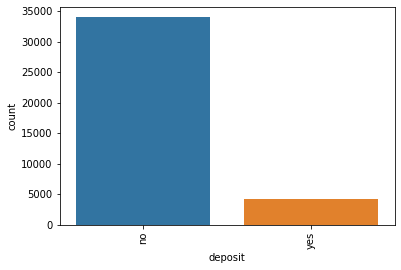

In [13]:
#Bar plots of categorical features

g = sns.countplot(x='deposit', data=bank, order = bank['deposit'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

## Highly imbalanced data

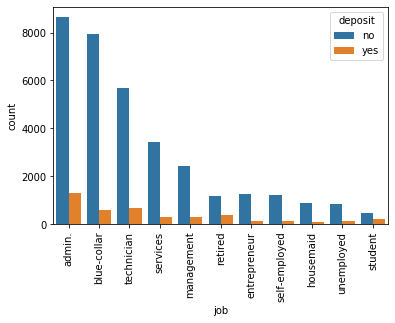

In [14]:
g = sns.countplot(x='job', data=bank, order = bank['job'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

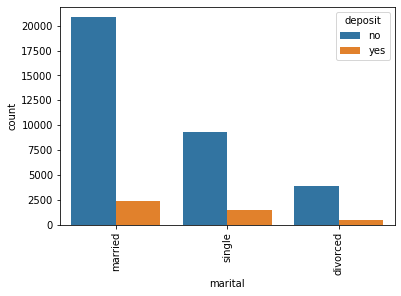

In [15]:
g = sns.countplot(x='marital', data=bank, order = bank['marital'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

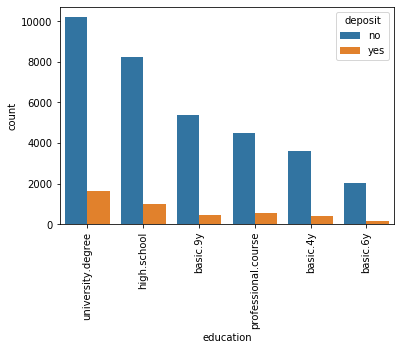

In [16]:
g = sns.countplot(x='education', data=bank, order = bank['education'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

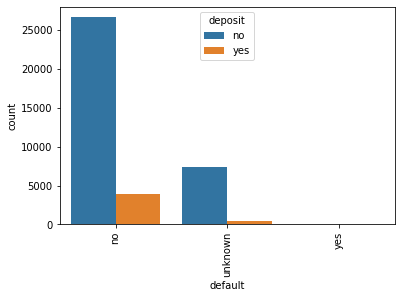

In [17]:
g = sns.countplot(x='default', data=bank, order = bank['default'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

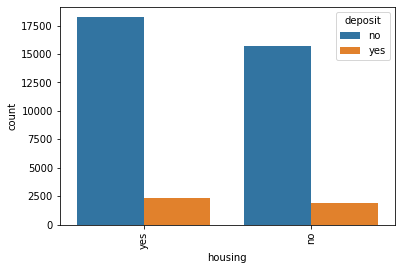

In [18]:
g = sns.countplot(x='housing', data=bank, order = bank['housing'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

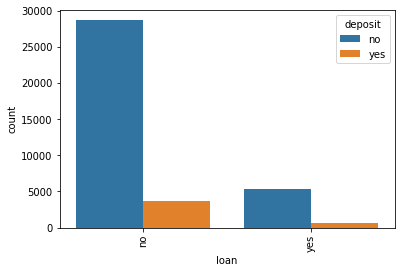

In [19]:
g = sns.countplot(x='loan', data=bank, order = bank['loan'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

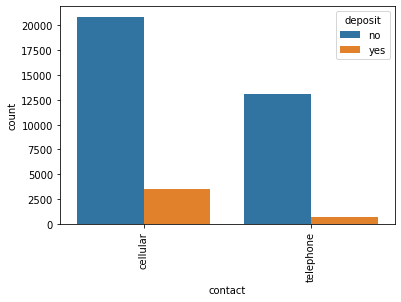

In [20]:
g = sns.countplot(x='contact', data=bank, order = bank['contact'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

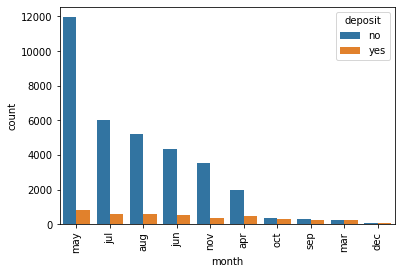

In [21]:
g = sns.countplot(x='month', data=bank, order = bank['month'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

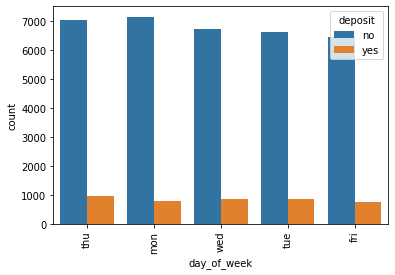

In [22]:
g = sns.countplot(x='day_of_week', data=bank, order = bank['day_of_week'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

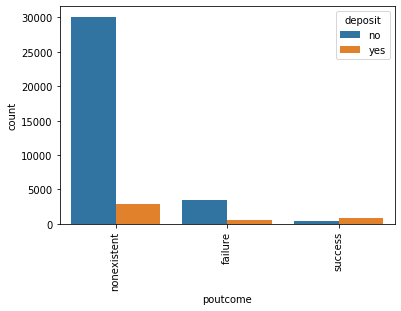

In [23]:
g = sns.countplot(x='poutcome', data=bank, order = bank['poutcome'].value_counts().index, hue="deposit")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

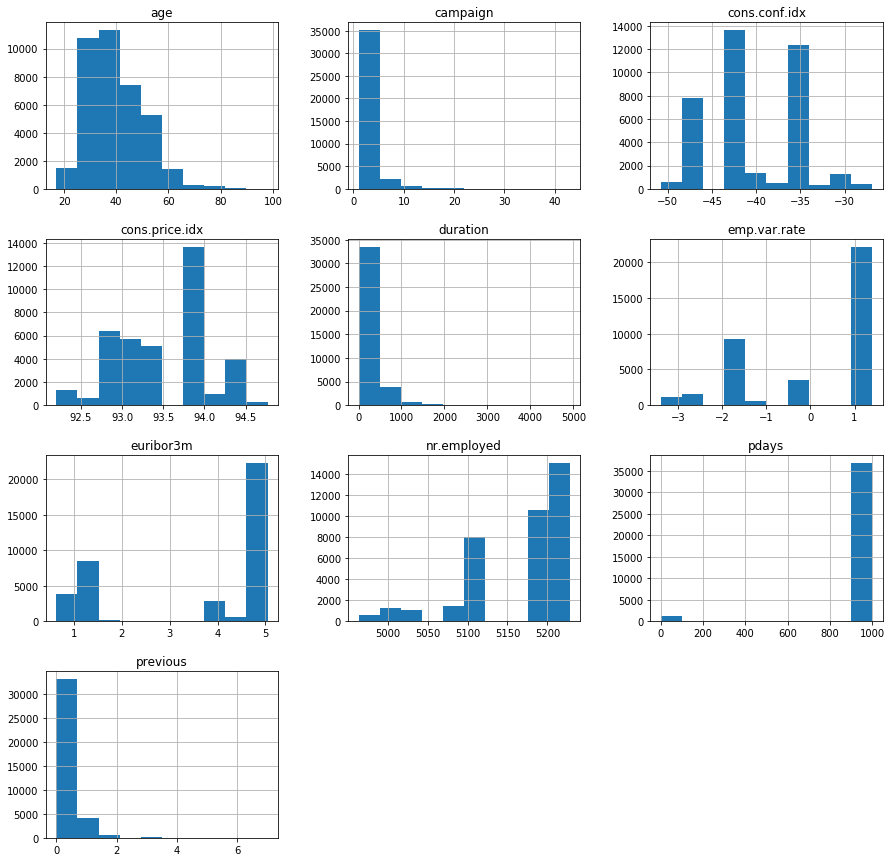

In [24]:
#Histogram grid
bank_numeric.hist(figsize=(15,15))
plt.show()

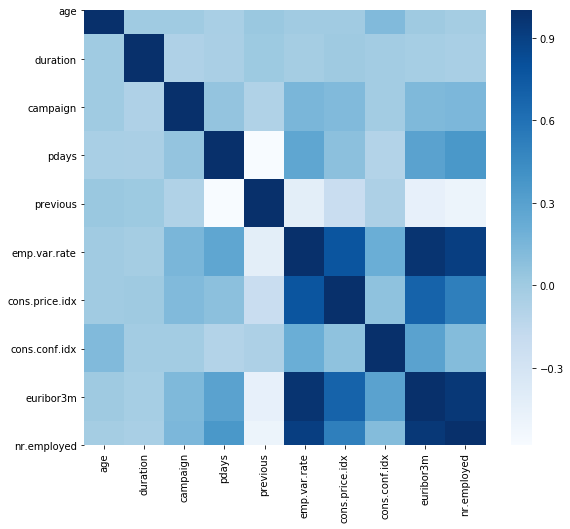

In [25]:
correlations = bank_numeric.corr()
plt.figure(figsize=(9,8))
heatmap = sns.heatmap(correlations, cmap="Blues")

In [26]:
bank_numeric.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38227.000000,38227.000000,38227.000000,38227.000000,38227.000000,38227.000000,38227.000000,38227.000000,38227.000000,38227.000000
mean,39.856803,258.198839,2.566798,963.540927,0.170037,0.082962,93.570432,-40.541442,3.623348,5167.430520
std,10.287613,259.774967,2.767912,184.272052,0.487235,1.565882,0.576321,4.622953,1.730220,71.764784
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [27]:
## Subscription Rate by Age

lst = [bank]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [28]:
count_age_response_pct = pd.crosstab(bank['deposit'],bank['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 


age = pd.DataFrame(bank['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

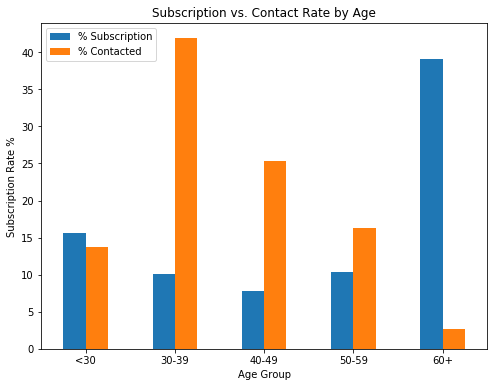

In [29]:
# Plot the results
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar', figsize=(8,6))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate %')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

In [30]:
## Subscription Rate by Duration

lst = [bank]
for column in lst:
    column.loc[column['duration'] < column['duration'].mean(),  'duration_group'] = 1
    column.loc[column['duration'] > column['duration'].mean(),  'duration_group'] = 2

In [31]:
count_duration_response_pct = pd.crosstab(bank['deposit'],bank['duration_group']).apply(lambda x: x/x.sum() * 100)
count_duration_response_pct = count_duration_response_pct.transpose() 


duration = pd.DataFrame(bank['duration_group'].value_counts())
duration['% Contacted'] = duration['duration_group']*100/duration['duration_group'].sum()
duration['% Subscription'] = count_duration_response_pct['yes']
duration.drop('duration_group',axis = 1,inplace = True)

duration['duration'] = [1,2]
duration = duration.sort_values('duration',ascending = True)

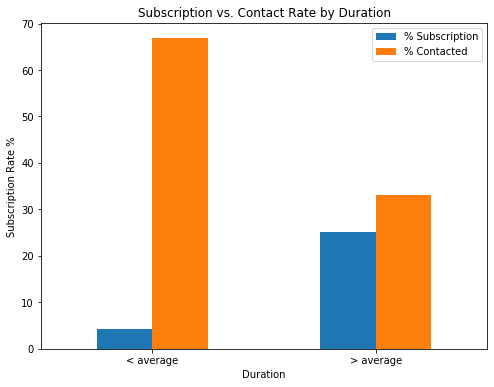

In [32]:
# Plot the results
plot_duration = duration[['% Subscription','% Contacted']].plot(kind = 'bar', figsize=(8,6))
plt.xlabel('Duration')
plt.ylabel('Subscription Rate %')
plt.xticks(np.arange(2), ('< average', '> average'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Duration')
plt.show()

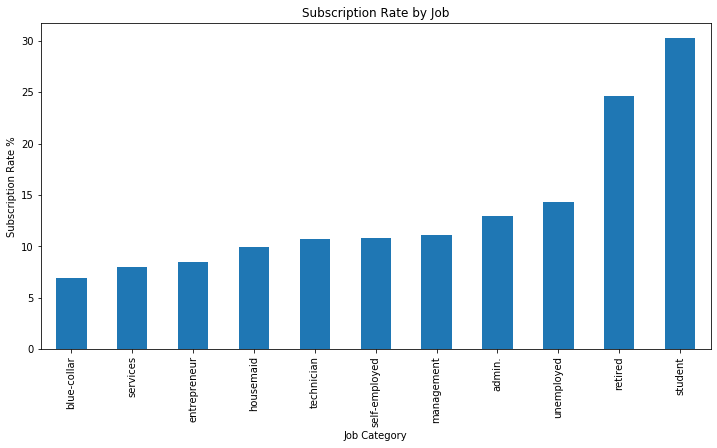

In [33]:
## Subscription Rate by Job

count_job_response_pct = pd.crosstab(bank['deposit'],bank['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()


# Plot the results
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar', figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.ylabel('Subscription Rate %')
plt.xlabel('Job Category');

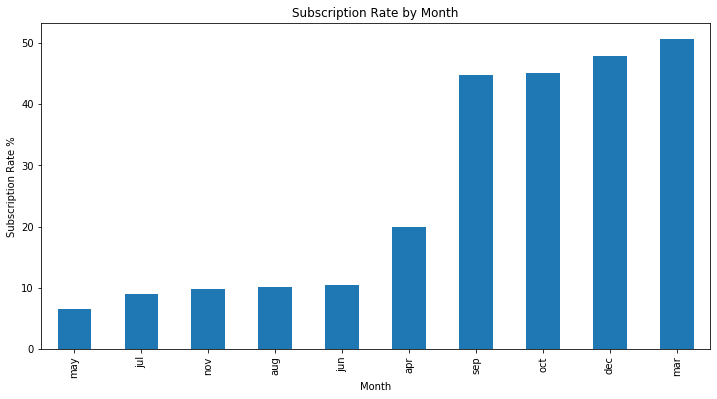

In [34]:
## Subscription Rate by Month

count_month_response_pct = pd.crosstab(bank['deposit'],bank['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose() 


# Plot the results
plot_month = count_month_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar', figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Month')
plt.ylabel('Subscription Rate %')
plt.xlabel('Month');

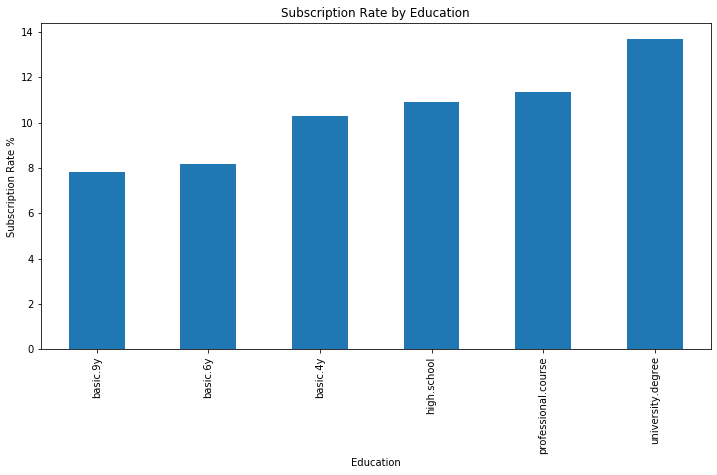

In [35]:
## Subscription Rate by Education

count_education_response_pct = pd.crosstab(bank['deposit'],bank['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose() 


# Plot the results
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar', figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Education')
plt.ylabel('Subscription Rate %')
plt.xlabel('Education');

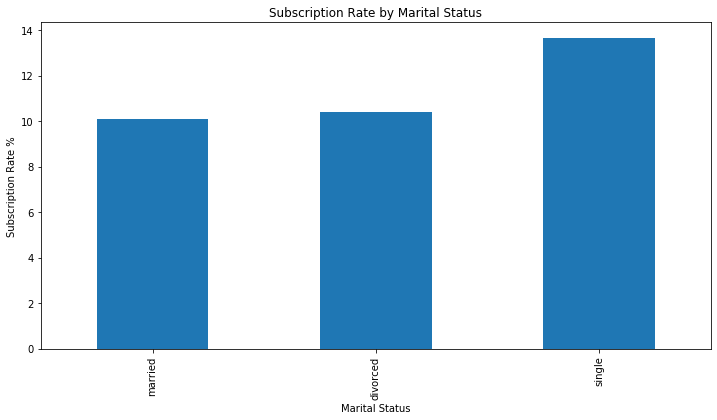

In [36]:
## Subscription Rate by Marital Status

count_marital_response_pct = pd.crosstab(bank['deposit'],bank['marital']).apply(lambda x: x/x.sum() * 100)
count_marital_response_pct = count_marital_response_pct.transpose() 


# Plot the results
plot_marital = count_marital_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar', figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Marital Status')
plt.ylabel('Subscription Rate %')
plt.xlabel('Marital Status');

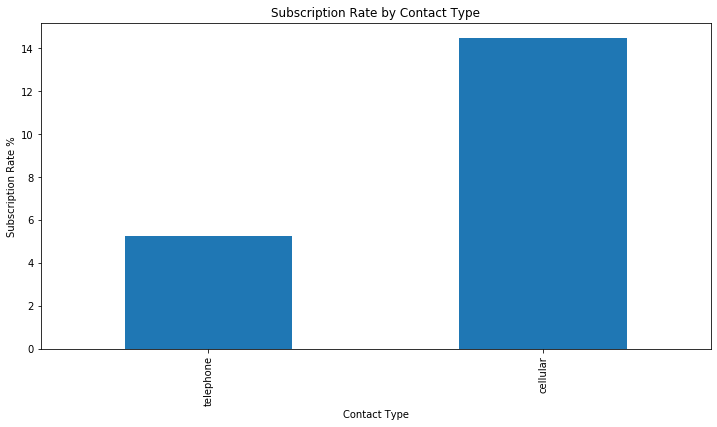

In [37]:
## Subscription Rate by Contact

count_contact_response_pct = pd.crosstab(bank['deposit'],bank['contact']).apply(lambda x: x/x.sum() * 100)
count_contact_response_pct = count_contact_response_pct.transpose() 


# Plot the results
plot_marital = count_contact_response_pct['yes'].sort_values(ascending = True).plot(kind ='bar', figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Contact Type')
plt.ylabel('Subscription Rate %')
plt.xlabel('Contact Type');

# DATA CLEANING

In [38]:
bank_non_numeric.job.value_counts()

admin.           9936
blue-collar      8552
technician       6380
services         3716
management       2728
retired          1574
entrepreneur     1358
self-employed    1346
housemaid         986
unemployed        963
student           688
Name: job, dtype: int64

In [39]:
# Create a new data, one-hot encoding all categorical values (start with job data)
bankNew = pd.get_dummies(bank_non_numeric["job"], prefix = "job")
bankNew.count()

job_admin.           38227
job_blue-collar      38227
job_entrepreneur     38227
job_housemaid        38227
job_management       38227
job_retired          38227
job_self-employed    38227
job_services         38227
job_student          38227
job_technician       38227
job_unemployed       38227
dtype: int64

In [40]:
bank_non_numeric.marital.value_counts()

married     23168
single      10759
divorced     4300
Name: marital, dtype: int64

In [41]:
#add marital data
bankNew = bankNew.join(pd.get_dummies(bank_non_numeric["marital"], prefix = "marital"))
print(bankNew.shape)
bankNew.head()

(38227, 14)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [42]:
bank_non_numeric.education.value_counts()

university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
Name: education, dtype: int64

In [43]:
#add education data
bankNew = bankNew.join(pd.get_dummies(bank_non_numeric["education"], prefix = "education"))
print(bankNew.shape)
bankNew.head()

(38227, 20)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [44]:
bank_non_numeric.default.value_counts()

no         30474
unknown     7750
yes            3
Name: default, dtype: int64

In [45]:
#add default data
bankNew = bankNew.join(pd.get_dummies(bank_non_numeric["default"], prefix = "default"))
print(bankNew.shape)
bankNew.head()

(38227, 23)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,default_no,default_unknown,default_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [46]:
bank_non_numeric.housing.value_counts()

yes    20568
no     17659
Name: housing, dtype: int64

In [47]:
# add housing data

LE = LabelEncoder()

bankNew["housing"] = LE.fit_transform(bank_non_numeric["housing"])
bankNew.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [48]:
bank_non_numeric.loan.value_counts()

no     32271
yes     5956
Name: loan, dtype: int64

In [49]:
# add loan data

bankNew["loan"] = LE.fit_transform(bank_non_numeric["loan"])
bankNew.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing,loan
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [50]:
bank_non_numeric.contact.value_counts()

cellular     24426
telephone    13801
Name: contact, dtype: int64

In [51]:
# add contact data

bankNew["contact"] = LE.fit_transform(bank_non_numeric["contact"])
bankNew.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_basic.9y,education_high.school,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing,loan,contact
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,1


In [52]:
bank_non_numeric.month.value_counts()

may    12791
jul     6625
aug     5817
jun     4846
nov     3895
apr     2434
oct      659
sep      502
mar      497
dec      161
Name: month, dtype: int64

In [53]:
#add month data
bankNew = bankNew.join(pd.get_dummies(bank_non_numeric["month"], prefix = "month"))
print(bankNew.shape)
bankNew.head()

(38227, 36)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
bank_non_numeric.day_of_week.value_counts()

thu    8005
mon    7926
wed    7600
tue    7476
fri    7220
Name: day_of_week, dtype: int64

In [55]:
#add day_of_week data
bankNew = bankNew.join(pd.get_dummies(bank_non_numeric["day_of_week"], prefix = "day"))
print(bankNew.shape)
bankNew.head()

(38227, 41)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [56]:
bank_non_numeric.poutcome.value_counts()

nonexistent    33050
failure         3935
success         1242
Name: poutcome, dtype: int64

In [57]:
#add poutcome data
bankNew = bankNew.join(pd.get_dummies(bank_non_numeric["poutcome"], prefix = "poutcome"))
print(bankNew.shape)
bankNew.head()

(38227, 44)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [58]:
bankNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38227 entries, 0 to 41187
Data columns (total 44 columns):
job_admin.                       38227 non-null uint8
job_blue-collar                  38227 non-null uint8
job_entrepreneur                 38227 non-null uint8
job_housemaid                    38227 non-null uint8
job_management                   38227 non-null uint8
job_retired                      38227 non-null uint8
job_self-employed                38227 non-null uint8
job_services                     38227 non-null uint8
job_student                      38227 non-null uint8
job_technician                   38227 non-null uint8
job_unemployed                   38227 non-null uint8
marital_divorced                 38227 non-null uint8
marital_married                  38227 non-null uint8
marital_single                   38227 non-null uint8
education_basic.4y               38227 non-null uint8
education_basic.6y               38227 non-null uint8
education_basic.9y         

In [59]:
bankNew = bankNew.join(bank_numeric)
print(bankNew.shape)
bankNew.head()

(38227, 54)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,0,0,0,0,0,0,0,1,0,0,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,0,0,0,0,0,0,0,1,0,0,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,1,0,0,0,0,0,0,0,0,0,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,0,0,0,0,0,0,0,1,0,0,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [60]:
bankNew.pdays.value_counts()

999    36862
3        393
6        378
4        106
2         57
9         55
12        53
7         52
5         45
10        44
13        33
11        26
1         24
15        22
14        18
0         15
8         14
16         8
17         6
18         5
19         3
22         3
21         2
26         1
25         1
27         1
Name: pdays, dtype: int64

In [61]:
bankNew.drop(["pdays", "duration"], axis=1, inplace=True)

In [62]:
bankNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38227 entries, 0 to 41187
Data columns (total 52 columns):
job_admin.                       38227 non-null uint8
job_blue-collar                  38227 non-null uint8
job_entrepreneur                 38227 non-null uint8
job_housemaid                    38227 non-null uint8
job_management                   38227 non-null uint8
job_retired                      38227 non-null uint8
job_self-employed                38227 non-null uint8
job_services                     38227 non-null uint8
job_student                      38227 non-null uint8
job_technician                   38227 non-null uint8
job_unemployed                   38227 non-null uint8
marital_divorced                 38227 non-null uint8
marital_married                  38227 non-null uint8
marital_single                   38227 non-null uint8
education_basic.4y               38227 non-null uint8
education_basic.6y               38227 non-null uint8
education_basic.9y         

In [63]:
bank['deposit'] = bank["deposit"] = LE.fit_transform(bank["deposit"])

bank.deposit.value_counts()

0    33973
1     4254
Name: deposit, dtype: int64

In [64]:
X = bankNew
y = bank.deposit

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.59262728, -0.53683211, -0.19191955, ...,  0.89585513,
         0.71301227,  0.32843111],
       [-0.59262728, -0.53683211, -0.19191955, ...,  0.89585513,
         0.71301227,  0.32843111],
       [-0.59262728, -0.53683211, -0.19191955, ...,  0.89585513,
         0.71301227,  0.32843111],
       ...,
       [-0.59262728, -0.53683211, -0.19191955, ..., -2.21907781,
        -1.50003067, -2.84029539],
       [-0.59262728, -0.53683211, -0.19191955, ..., -2.21907781,
        -1.50003067, -2.84029539],
       [-0.59262728, -0.53683211, -0.19191955, ..., -2.21907781,
        -1.50003067, -2.84029539]])

In [65]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(ratio='auto', kind='regular', random_state=1)
X_sampled,y_sampled=sm.fit_sample(X_scaled,y)


In [66]:
X_sampled

array([[-0.59262728, -0.53683211, -0.19191955, ...,  0.89585513,
         0.71301227,  0.32843111],
       [-0.59262728, -0.53683211, -0.19191955, ...,  0.89585513,
         0.71301227,  0.32843111],
       [-0.59262728, -0.53683211, -0.19191955, ...,  0.89585513,
         0.71301227,  0.32843111],
       ...,
       [ 1.62560126, -0.53683211, -0.19191955, ...,  2.95084561,
        -1.67671683, -2.08922081],
       [-0.59262728, -0.53683211, -0.19191955, ..., -1.20485567,
        -1.35732124, -0.97466305],
       [-0.59262728, -0.53683211, -0.19191955, ..., -1.4187131 ,
        -1.28558782, -0.95215801]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, random_state=1)

In [68]:
## NULL ACCURACY

print("Null Accuracy: ", max(y_test.mean(), 1 - y_test.mean()))

Null Accuracy:  0.5070347913110025


# MODELS

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)


## training accuracy
y_train_pred_logreg = logreg.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_logreg))


## test accuracy
y_test_pred_logreg = logreg.predict(X_test)
print("Test Accuracy:     ", accuracy_score(y_test, y_test_pred_logreg))

print(" ")
print(confusion_matrix(y_test, y_test_pred_logreg))
print(" ")

print("Recall:    ", recall_score(y_test, y_test_pred_logreg))     ##  TP / TP+FN   When the actual value is positive, how often is the prediction correct?
print("Precision: ", precision_score(y_test, y_test_pred_logreg))  ##  TP / TP+FP   When a positive value is predicted, how often is the prediction correct?

Training Accuracy:  0.7381424282266136
Test Accuracy:      0.736916465532466
 
[[7192 1421]
 [3048 5326]]
 
Recall:     0.6360162407451636
Precision:  0.7893878760930784


In [70]:
from sklearn.tree import DecisionTreeClassifier


treeclass = DecisionTreeClassifier(max_depth=13, random_state=1)
treeclass.fit(X_train, y_train)


## training accuracy
y_train_pred_tree = treeclass.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_tree))


## test accuracy
y_test_pred_tree = treeclass.predict(X_test)
print("Test Accuracy:     ", accuracy_score(y_test, y_test_pred_tree))

print(" ")
print(confusion_matrix(y_test, y_test_pred_tree))
print(" ")

print("Recall:    ", recall_score(y_test, y_test_pred_tree))     ##  TP / TP+FN   When the actual value is positive, how often is the prediction correct?
print("Precision: ", precision_score(y_test, y_test_pred_tree))  ##  TP / TP+FP   When a positive value is predicted, how often is the prediction correct?

Training Accuracy:  0.9223689632842089
Test Accuracy:      0.8996291281568258
 
[[8093  520]
 [1185 7189]]
 
Recall:     0.8584905660377359
Precision:  0.9325463743676222


In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 40, random_state=1)
rfc.fit(X_train, y_train)


## training accuracy
y_train_pred_rfc = rfc.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_rfc))


## test accuracy
y_test_pred_rfc = rfc.predict(X_test)
print("Test Accuracy:     ", accuracy_score(y_test, y_test_pred_rfc))

print(" ")
print(confusion_matrix(y_test, y_test_pred_rfc))
print(" ")

print("Recall:    ", recall_score(y_test, y_test_pred_rfc))     ##  TP / TP+FN   When the actual value is positive, how often is the prediction correct?
print("Precision: ", precision_score(y_test, y_test_pred_rfc))  ##  TP / TP+FP   When a positive value is predicted, how often is the prediction correct?

Training Accuracy:  0.9967817264859985
Test Accuracy:      0.9394831341614176
 
[[8181  432]
 [ 596 7778]]
 
Recall:     0.9288273226653929
Precision:  0.9473812423873326


In [72]:
## F1 Score = 2 * (Precision*Recall)  /  (Precision + Recall)   Weighted avg of Precision and Recall

from sklearn.metrics import f1_score

def scorer(i,j,k):
    for every in (i,j,k):
        every.fit(X_train,y_train)
        print (every.__class__.__name__, 'F1 score =', f1_score(y_test,every.predict(X_test)))
scorer (logreg,treeclass,rfc)

LogisticRegression F1 score = 0.7044507638383705
DecisionTreeClassifier F1 score = 0.8939874401542001
RandomForestClassifier F1 score = 0.9380125422093584


# CLASSIFICATION THRESHOLD

In [73]:
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [74]:
logreg.predict_proba(X_test)[0:10]

array([[0.71480819, 0.28519181],
       [0.70052183, 0.29947817],
       [0.68771911, 0.31228089],
       [0.786699  , 0.213301  ],
       [0.68727084, 0.31272916],
       [0.12918002, 0.87081998],
       [0.46597879, 0.53402121],
       [0.81309252, 0.18690748],
       [0.47283454, 0.52716546],
       [0.78929512, 0.21070488]])

In [76]:
# Logistic Regression
from sklearn.preprocessing import binarize

y_pred_prob_log = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_log = y_pred_prob_log.reshape(1, -1)
y_test_pred_logreg2 = binarize(y_pred_prob_log, 0.6)[0]

In [77]:
y_test_pred_logreg2[0:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [78]:
## training accuracy
y_train_pred_logreg = logreg.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_logreg))


## test accuracy
print("Test Accuracy:     ", accuracy_score(y_test, y_test_pred_logreg2))

print(" ")
print(confusion_matrix(y_test, y_test_pred_logreg2))
print(" ")

print("Recall:    ", recall_score(y_test, y_test_pred_logreg2))     ##  TP / TP+FN   When the actual value is positive, how often is the prediction correct?
print("Precision: ", precision_score(y_test, y_test_pred_logreg2))  ##  TP / TP+FP   When a positive value is predicted, how often is the prediction correct?

Training Accuracy:  0.7381424282266136
Test Accuracy:      0.7387413904750691
 
[[7695  918]
 [3520 4854]]
 
Recall:     0.579651301647958
Precision:  0.840956340956341


In [79]:
# Decision Tree

y_pred_prob_tree = treeclass.predict_proba(X_test)[:, 1]
y_pred_prob_tree = y_pred_prob_tree.reshape(1, -1)
y_test_pred_tree2 = binarize(y_pred_prob_tree, 0.6)[0]

In [80]:
## training accuracy
y_train_pred_tree = treeclass.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_tree))


## test accuracy
print("Test Accuracy:     ", accuracy_score(y_test, y_test_pred_tree2))

print(" ")
print(confusion_matrix(y_test, y_test_pred_tree2))
print(" ")

print("Recall:    ", recall_score(y_test, y_test_pred_tree2))     ##  TP / TP+FN   When the actual value is positive, how often is the prediction correct?
print("Precision: ", precision_score(y_test, y_test_pred_tree2))  ##  TP / TP+FP   When a positive value is predicted, how often is the prediction correct?

Training Accuracy:  0.9223689632842089
Test Accuracy:      0.8995702596102902
 
[[8265  348]
 [1358 7016]]
 
Recall:     0.8378313828516838
Precision:  0.9527430744160782


In [81]:
# Random Forest  0.6 Treshold

y_pred_prob_rfc = rfc.predict_proba(X_test)[:, 1]
y_pred_prob_rfc = y_pred_prob_rfc.reshape(1, -1)
y_test_pred_rfc2 = binarize(y_pred_prob_rfc, 0.6)[0]

In [82]:
## training accuracy
y_train_pred_rfc = rfc.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_rfc))


## test accuracy
print("Test Accuracy:     ", accuracy_score(y_test, y_test_pred_rfc2))

print(" ")
print(confusion_matrix(y_test, y_test_pred_rfc2))
print(" ")

print("Recall:    ", recall_score(y_test, y_test_pred_rfc2))     ##  TP / TP+FN   When the actual value is positive, how often is the prediction correct?
print("Precision: ", precision_score(y_test, y_test_pred_rfc2))  ##  TP / TP+FP   When a positive value is predicted, how often is the prediction correct?

Training Accuracy:  0.9967817264859985
Test Accuracy:      0.9391887914287397
 
[[8339  274]
 [ 759 7615]]
 
Recall:     0.9093623119178409
Precision:  0.965268094815566


In [85]:
# Random Forest  0.3 Treshold

y_pred_prob_rfc = rfc.predict_proba(X_test)[:, 1]
y_pred_prob_rfc = y_pred_prob_rfc.reshape(1, -1)
y_test_pred_rfc3 = binarize(y_pred_prob_rfc, 0.3)[0]


## training accuracy
y_train_pred_rfc = rfc.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred_rfc))


## test accuracy
print("Test Accuracy:     ", accuracy_score(y_test, y_test_pred_rfc3))

print(" ")
print(confusion_matrix(y_test, y_test_pred_rfc3))
print(" ")

print("Recall:    ", recall_score(y_test, y_test_pred_rfc3))     ##  TP / TP+FN   When the actual value is positive, how often is the prediction correct?
print("Precision: ", precision_score(y_test, y_test_pred_rfc3))  ##  TP / TP+FP   When a positive value is predicted, how often is the prediction correct?

Training Accuracy:  0.9967817264859985
Test Accuracy:      0.9231176782245246
 
[[7676  937]
 [ 369 8005]]
 
Recall:     0.9559350370193456
Precision:  0.8952135987474837


In [83]:
## Random Forest ELI5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = bankNew.columns.tolist())

Weight,Feature
0.0534 ± 0.0029,campaign
0.0421 ± 0.0025,contact
0.0379 ± 0.0013,housing
0.0158 ± 0.0026,nr.employed
0.0156 ± 0.0010,euribor3m
0.0103 ± 0.0011,age
0.0092 ± 0.0012,emp.var.rate
0.0082 ± 0.0011,loan
0.0071 ± 0.0014,cons.conf.idx
0.0061 ± 0.0011,cons.price.idx


In [84]:
## Decision Tree ELI5
perm = PermutationImportance(treeclass, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = bankNew.columns.tolist())

Weight,Feature
0.1849 ± 0.0032,campaign
0.1202 ± 0.0045,nr.employed
0.0634 ± 0.0004,euribor3m
0.0620 ± 0.0029,cons.conf.idx
0.0334 ± 0.0026,contact
0.0324 ± 0.0016,housing
0.0216 ± 0.0017,day_wed
0.0172 ± 0.0022,day_thu
0.0147 ± 0.0012,emp.var.rate
0.0115 ± 0.0016,month_jul


In [86]:
## Decision Tree Feature Importance
pd.DataFrame({'feature':bankNew.columns, 'importance':treeclass.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
45,campaign,0.387638
51,nr.employed,0.272491
49,cons.conf.idx,0.053697
23,housing,0.041525
50,euribor3m,0.040363
44,age,0.019185
25,contact,0.017779
40,day_wed,0.016541
38,day_thu,0.014480
34,month_oct,0.013990


In [ ]:
import pickle

In [ ]:
out_s = open('bank_logreg.pkl', 'wb')
pickle.dump(logreg, out_s)
out_s.close()

In [ ]:
out_s = open('bank_treeclass.pkl', 'wb')
pickle.dump(treeclass, out_s)
out_s.close()

In [ ]:
out_s = open('bank_rfc.pkl', 'wb')
pickle.dump(rfc, out_s)
out_s.close()

In [87]:
from sklearn.externals import joblib
 
import azureml.core
from azureml.core import Workspace
from azureml.core.model import Model
from azureml.core import Experiment
from azureml.core.webservice import Webservice
from azureml.core.image import ContainerImage
from azureml.core.webservice import AciWebservice
from azureml.core.conda_dependencies import CondaDependencies

In [88]:
! az login

[
  {
    "cloudName": "AzureCloud",
    "id": "3c3bb71f-3a4c-436f-9e0a-7407d75a82fa",
    "isDefault": true,
    "name": "Microsoft Partner Network",
    "state": "Enabled",
    "tenantId": "674d3e6c-45f7-42e9-938c-fcd01e3ff57c",
    "user": {
      "name": "burak.senocak@divergence.ai",
      "type": "user"
    }
  }
]


In [89]:
from azureml.core.authentication import AzureCliAuthentication

cli_auth = AzureCliAuthentication()

ws = Workspace(subscription_id="3c3bb71f-3a4c-436f-9e0a-7407d75a82fa",
               resource_group="data-science-immersive-04",
               workspace_name="mlworkspace02",
               auth=cli_auth)

print("Found workspace {} at location {}".format(ws.name, ws.location))

Found workspace mlworkspace02 at location southcentralus


In [90]:
import datetime

exp = Experiment(workspace=ws, name='capexp')
run = exp.start_logging()                   
run.log("Experiment start time", str(datetime.datetime.now()))

In [91]:
import pickle

out_rfc = open('bank_rfc.pkl', 'wb')
pickle.dump(rfc, out_rfc)
out_rfc.close()

In [92]:
in_rfc = open('bank_rfc.pkl', 'rb')
rfc = pickle.load(in_rfc)
in_rfc.close()

In [93]:
run.log("Training Accuracy: ", accuracy_score(y_train, y_train_pred_rfc))
run.log("Test Accuracy:     ", accuracy_score(y_test, y_test_pred_rfc))
run.log("Confusion Matrix:  ", confusion_matrix(y_test, y_test_pred_rfc))
run.log("Recall:    ", recall_score(y_test, y_test_pred_rfc))
run.log("Precision: ", precision_score(y_test, y_test_pred_rfc))
 
run.log("Experiment end time", str(datetime.datetime.now()))
run.complete()

WARNING - Converted key Confusion Matrix:   of value [[8181  432]
 [ 596 7778]] to array([[8181,  432],
       [ 596, 7778]], dtype=int64).



In [94]:
model = Model.register(model_path = 'bank_rfc.pkl',
                       model_name = "rfc_model",
                       tags = {"key": "1"},
                       description = "Bank Marketing",
                       workspace = ws)

Registering model rfc_model


In [95]:
rfcenv = CondaDependencies()
rfcenv.add_conda_package("scikit-learn")
 
with open("rfcenv.yml","w") as f:
    f.write(rfcenv.serialize_to_string())

with open("rfcenv.yml","r") as f:
    print(f.read())

# Conda environment specification. The dependencies defined in this file will

# be automatically provisioned for runs with userManagedDependencies=False.


# Details about the Conda environment file format:

# https://conda.io/docs/user-guide/tasks/manage-environments.html#create-env-file-manually


name: project_environment
dependencies:
  # The python interpreter version.

  # Currently Azure ML only supports 3.5.2 and later.

- python=3.6.2

- pip:
    # Required packages for AzureML execution, history, and data preparation.

  - azureml-defaults

- scikit-learn
channels:
- conda-forge



In [96]:
%%writefile bank.py
 
import json
import os
 
from azureml.core.model import Model
 
def init():
    global model
    # retrieve the path to the model file using the model name
    model_path = Model.get_model_path('rfc_model')
    model = joblib.load(model_path)

def run(raw_data):
    data = np.array(json.loads(raw_data)['data'])
    # make prediction
    y_hat = model.predict(data)
    return json.dumps(y_hat.tolist())

Overwriting bank.py


In [97]:
%%time
 
image_config = ContainerImage.image_configuration(execution_script="bank.py", 
                                                  runtime="python", 
                                                  conda_file="rfcenv.yml")

Wall time: 999 µs


In [98]:
%%time

aciconfig = AciWebservice.deploy_configuration(cpu_cores=1, 
                                               memory_gb=1, 
                                               tags={"data": "Bank",  "method" : "sklearn"}, 
                                               description='Predict Bank Term Deposit Subscription')
 
service = Webservice.deploy_from_model(workspace=ws,
                                       name='rfc-burak-06',
                                       deployment_config=aciconfig,
                                       models=[model],
                                       image_config=image_config)
 
service.wait_for_deployment(show_output=True)

Creating image
Running......................................
Succeeded
Image creation operation finished for image rfc-burak-06:1, operation "Succeeded"
Running...............................................................................................................................................................................................................................................
TimedOut


ERROR - Service deployment polling reached non-successful terminal state, current service state: Unhealthy
More information can be found using '.get_logs()'
Error:
{
  "code": "DeploymentTimedOut",
  "statusCode": 504,
  "message": "The deployment operation polling has TimedOut. The service creation is taking longer than our normal time. We are still trying to achieve the desired state for the web service. Please check the webservice state for the current webservice health. From SDK you can run print(service.state) to know the current state of the webservice."
}

ERROR - Service deployment polling reached non-successful terminal state, current service state: Unhealthy
More information can be found using '.get_logs()'
Error:
{
  "code": "DeploymentTimedOut",
  "statusCode": 504,
  "message": "The deployment operation polling has TimedOut. The service creation is taking longer than our normal time. We are still trying to achieve the desired state for the web service. Please check the web

WebserviceException: WebserviceException:
	Message: Service deployment polling reached non-successful terminal state, current service state: Unhealthy
More information can be found using '.get_logs()'
Error:
{
  "code": "DeploymentTimedOut",
  "statusCode": 504,
  "message": "The deployment operation polling has TimedOut. The service creation is taking longer than our normal time. We are still trying to achieve the desired state for the web service. Please check the webservice state for the current webservice health. From SDK you can run print(service.state) to know the current state of the webservice."
}
	InnerException None
	ErrorResponse 
{
    "error": {
        "message": "Service deployment polling reached non-successful terminal state, current service state: Unhealthy\nMore information can be found using '.get_logs()'\nError:\n{\n  \"code\": \"DeploymentTimedOut\",\n  \"statusCode\": 504,\n  \"message\": \"The deployment operation polling has TimedOut. The service creation is taking longer than our normal time. We are still trying to achieve the desired state for the web service. Please check the webservice state for the current webservice health. From SDK you can run print(service.state) to know the current state of the webservice.\"\n}"
    }
}

In [ ]:
print(service.scoring_uri)

In [ ]:
import requests
import json

# URL for the web service
scoring_uri = service.scoring_uri

# If the service is authenticated, set the key
#key = '<your key>'

# Two sets of data to score, so we get two results back
data = { "data": [[45]] }

# Convert to JSON string
input_data = json.dumps(data)

# Set the content type
headers = { 'Content-Type':'application/json' }

# If authentication is enabled, set the authorization header
#headers['Authorization']=f'Bearer {key}'

# Make the request and display the response
resp = requests.post(scoring_uri, input_data, headers = headers)
print(resp.text)